In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_storage_path, EstimateQuantities1Run, AverageEstimates
# from geobin import EstimateQuantities1Run, AveragedEstimates

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


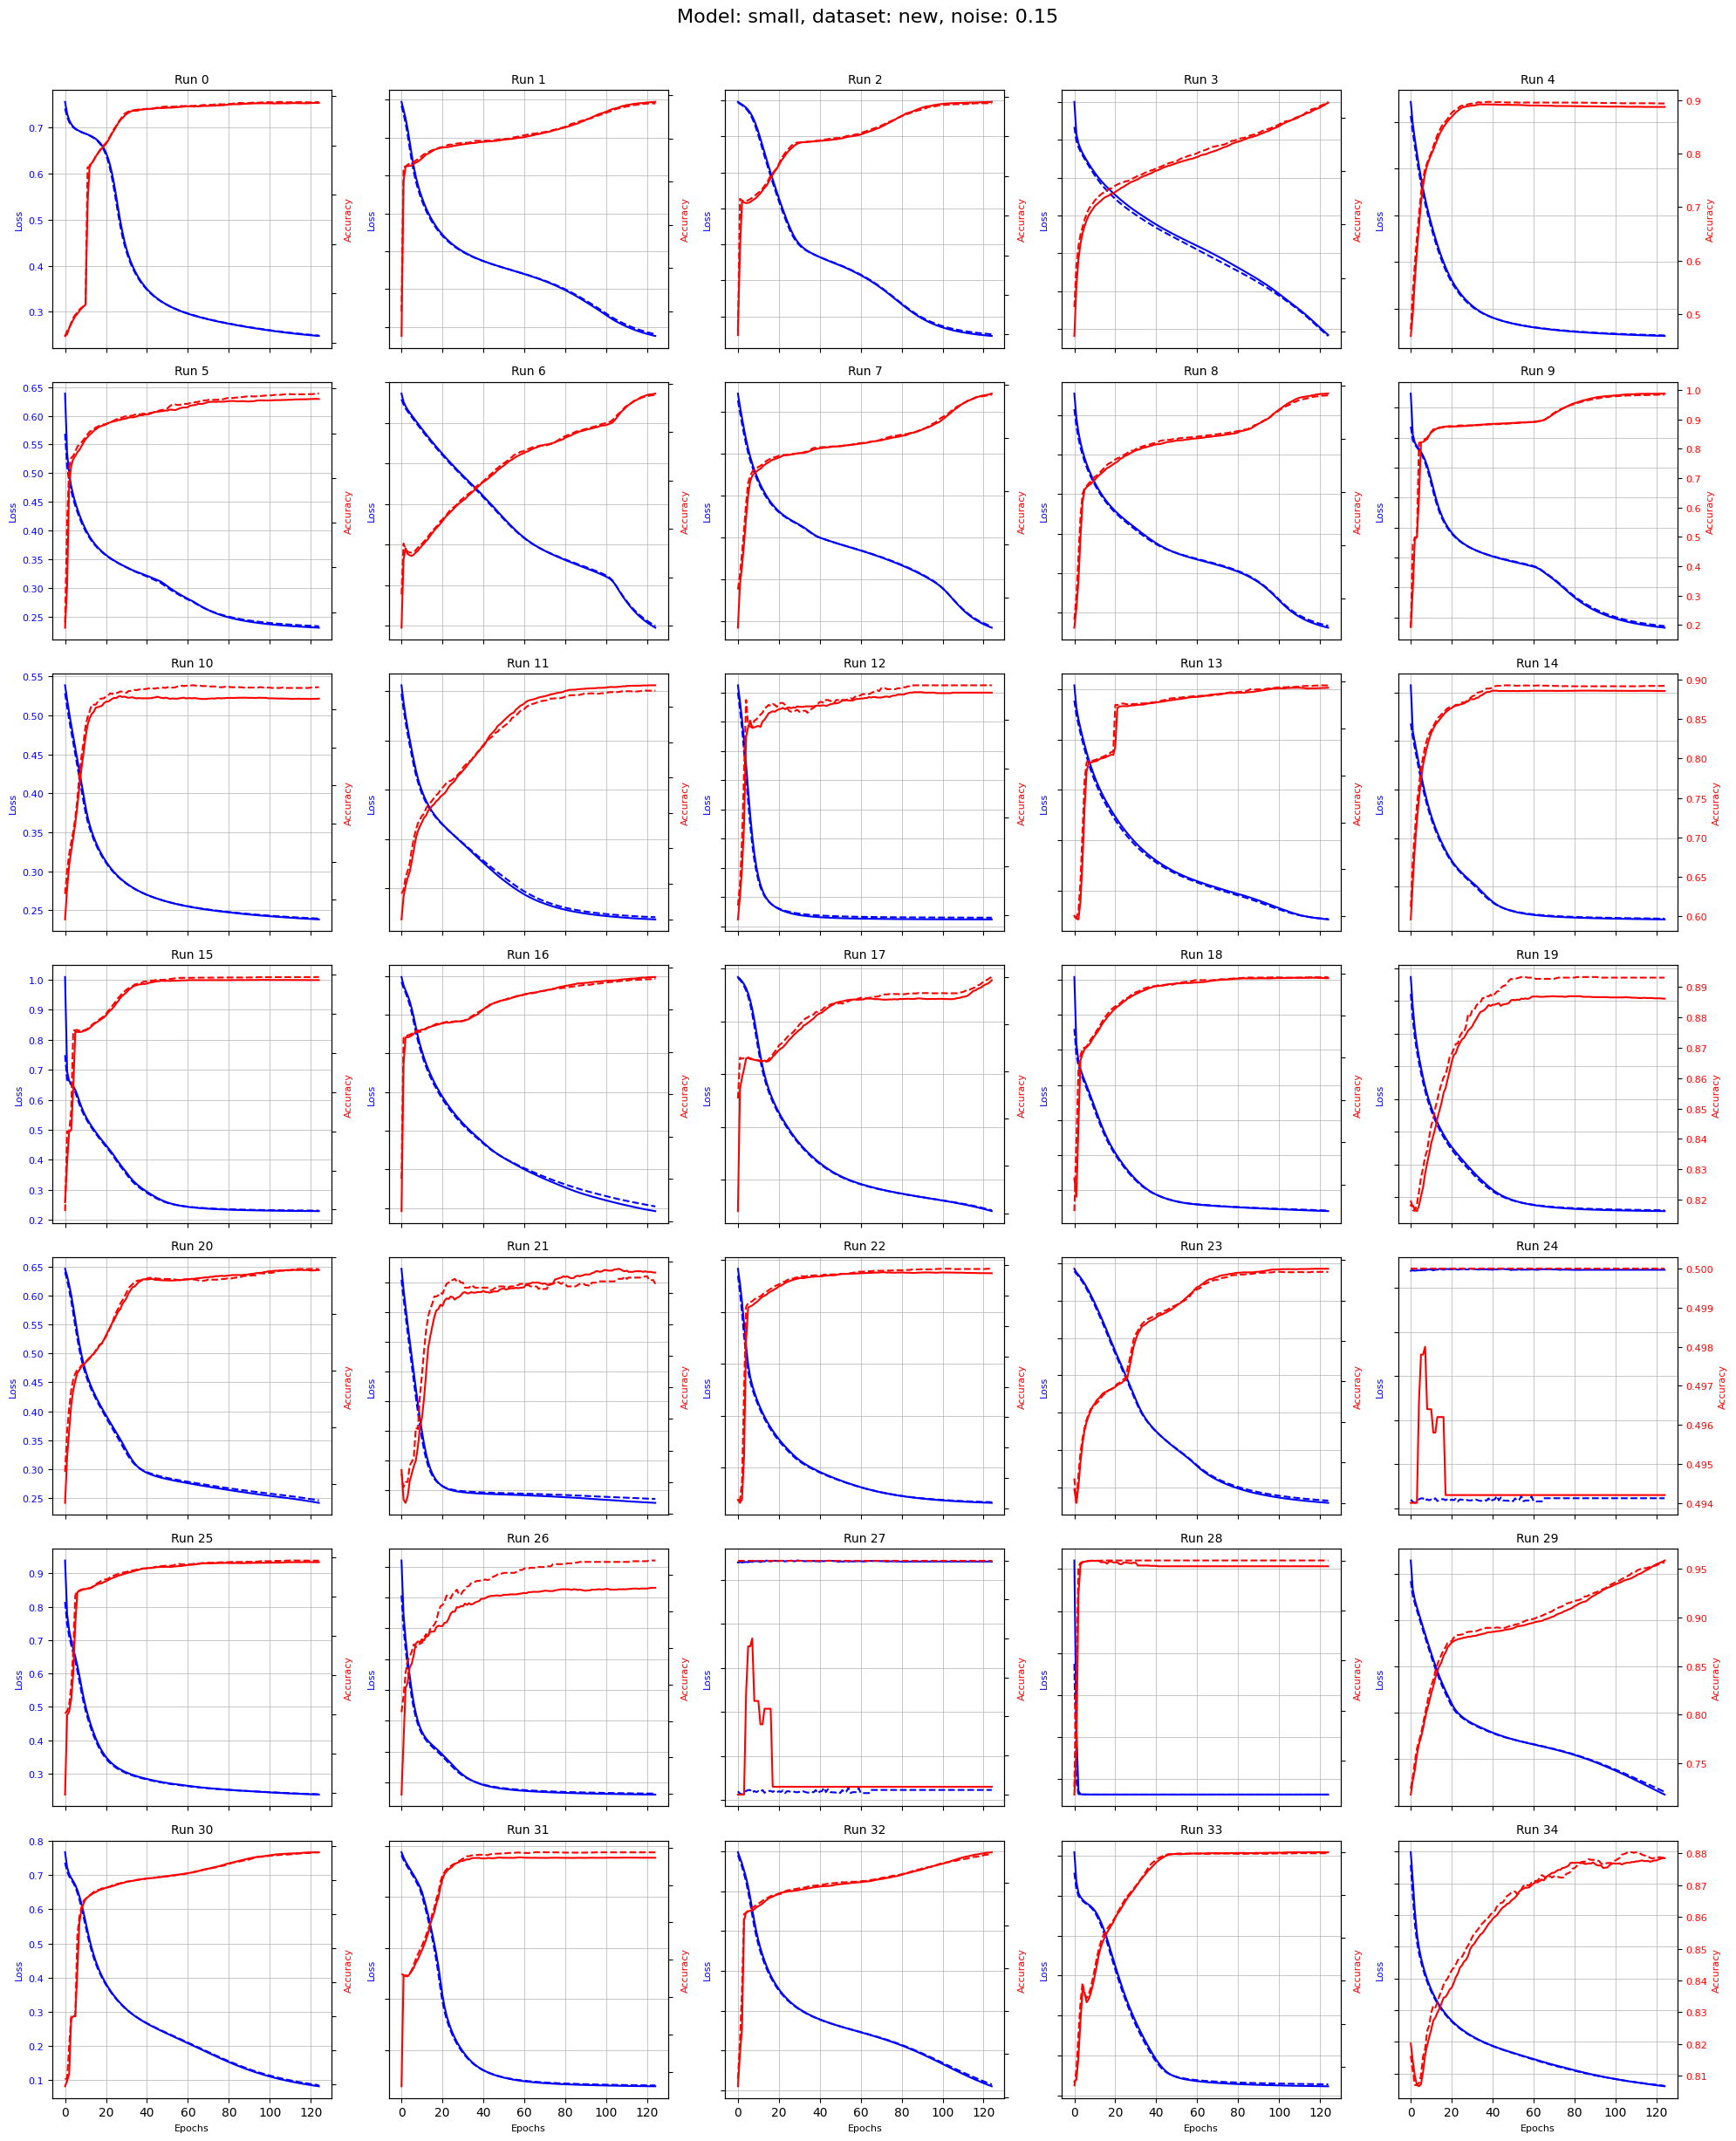

In [3]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.15)

In [4]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [5]:
first_run = EstimateQuantities1Run(model_name="small", dataset_name="new", noise_level=0.15, run_number=0)

In [6]:
MI = first_run.estimates["MI_KL"]
MI

[]

In [7]:
first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [8]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


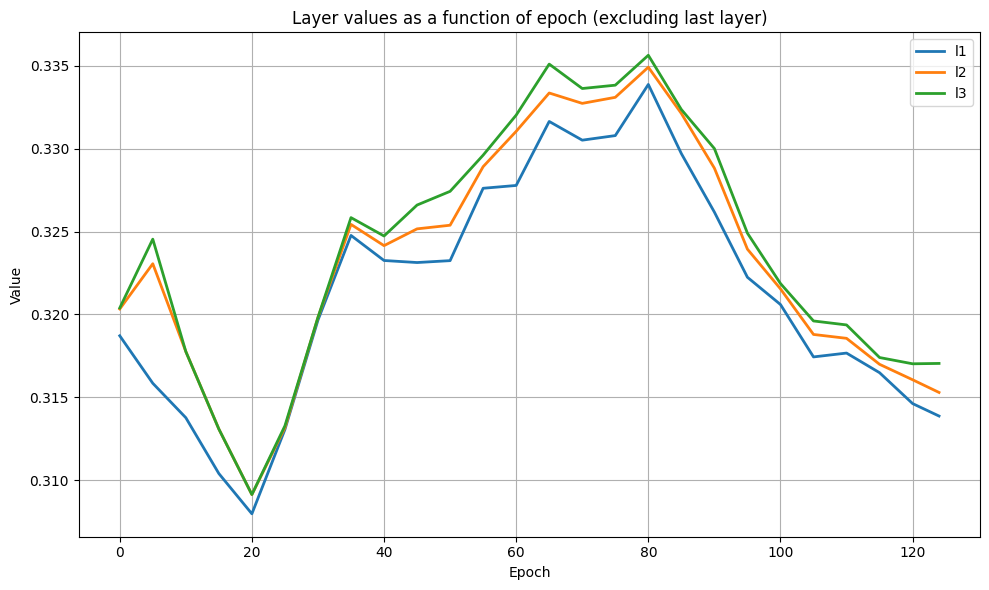

In [9]:
plot_layers_exclude_last(MI)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            model_name=model_name,
            dataset_name=dataset_name,
            noise_level=noise_level,
            run_number=int(run_number)
        )
        run.calculate_estimates()
        df = run.estimates["MI_KL"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


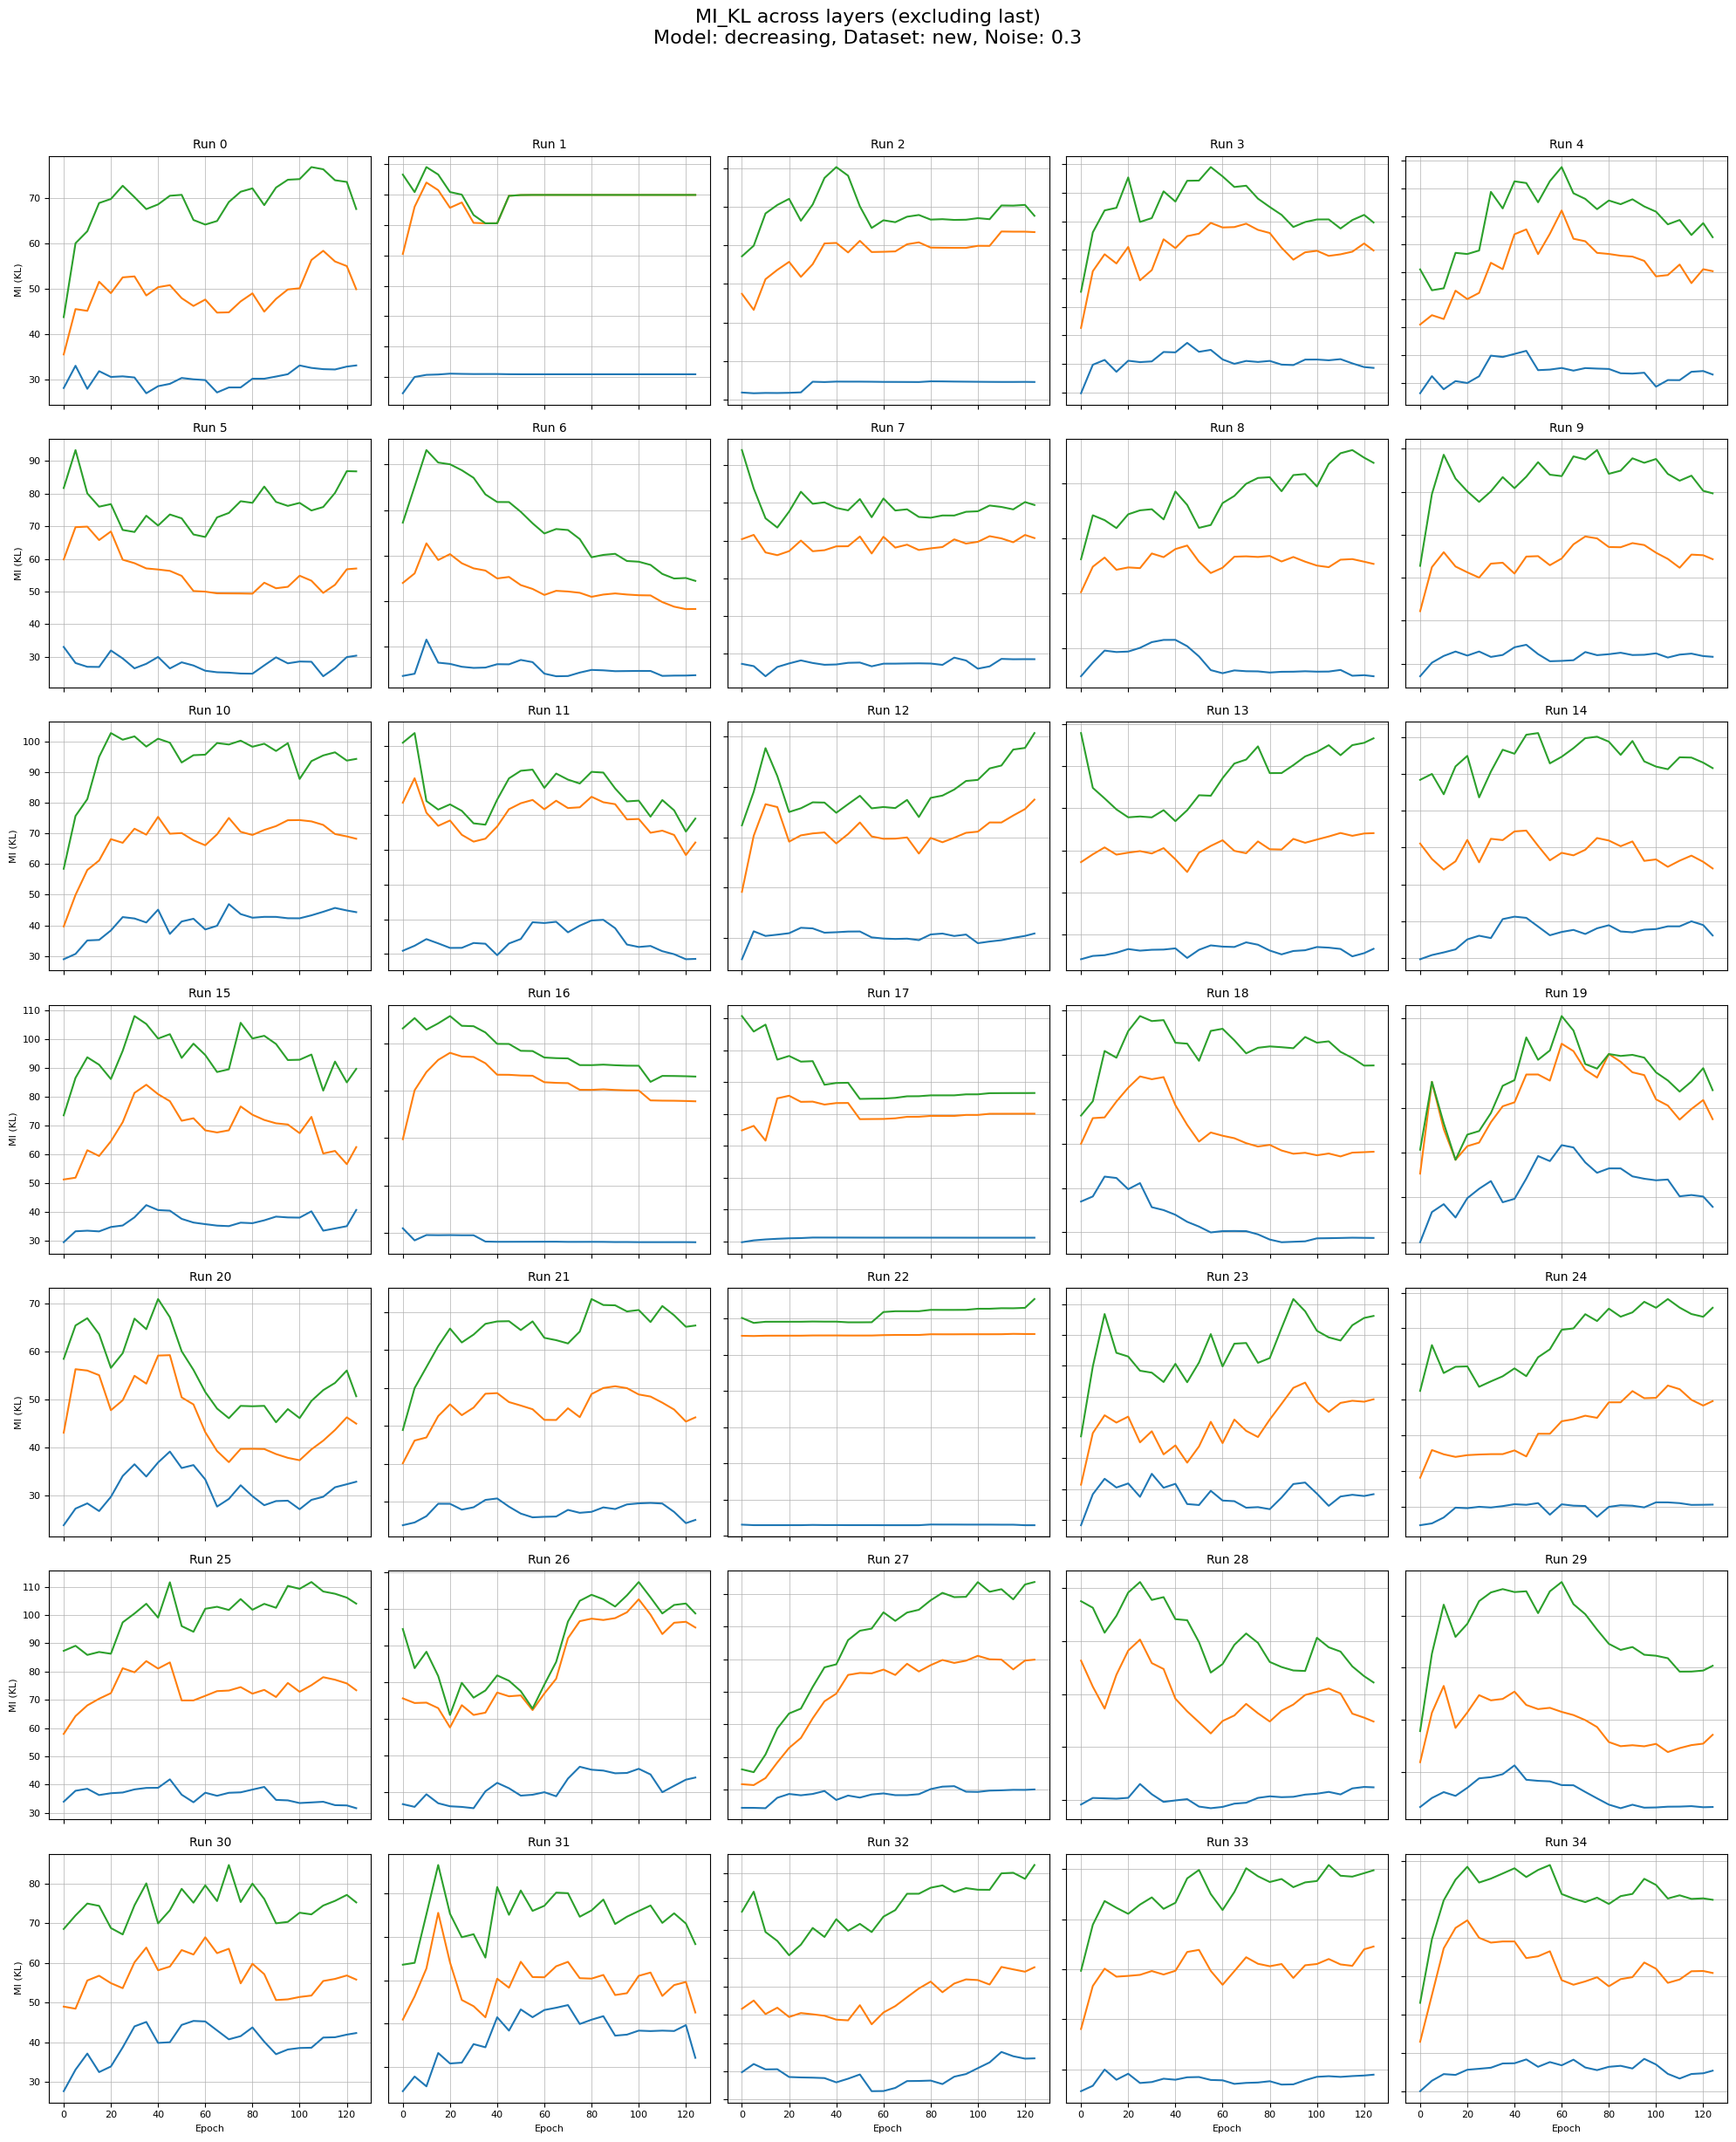

In [23]:
plot_multiple_runs_MI_layers_grid(
    model_name="decreasing",
    dataset_name="new",
    noise_level=0.3,
    run_numbers=np.arange(35)
)

In [35]:
avg1 = AverageEstimates(model_name="decreasing", noise_level=0.3)
agg = avg1.collect()

In [36]:
dfs = agg["MI_IS"]

In [37]:
# # dfs = avg1.individual_estimates["MI_IS"]set_name,
#             noise_level,
#             run_number,

In [38]:
all_runs = (
    pd.concat(dfs, keys=range(35), names=["run", "row"])
      .reset_index(level="run")
)


In [39]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,0,0,28.134227,35.530146,43.757322,47.281511
1,0,5,33.042465,45.531810,60.036879,66.002310
2,0,10,27.959488,45.142656,62.685301,70.001622
3,0,15,31.850349,51.558818,68.903744,82.511610
4,0,20,30.575773,49.039718,69.792794,88.924170
...,...,...,...,...,...,...
21,34,105,34.629650,58.354979,80.338061,104.206458
22,34,110,33.408834,59.226145,81.180719,102.714863
23,34,115,34.594948,61.377104,80.241700,102.238982


In [40]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [41]:
summary

l1                   l2                    l3             \
            mean       std       mean        std       mean        std   
epoch                                                                    
0      29.556340  3.099216  54.886173  14.534624  74.622357  24.056269   
5      32.376841  4.451869  62.765414  14.807092  82.301648  22.790874   
10     33.884128  5.845939  65.126792  14.733734  84.847662  23.062019   
15     33.972801  5.010911  65.747725  13.687747  84.633482  21.655360   
20     34.657962  4.944739  66.594594  14.804331  85.124077  23.510514   
25     35.303858  5.559485  66.418087  15.456704  84.976731  23.519492   
30     35.781501  5.753660  67.924500  15.017377  87.104048  23.601819   
35     35.949657  5.781278  68.562160  16.424148  87.886746  24.370806   
40     36.399915  6.119906  68.729619  15.123385  88.268215  22.684040   
45     35.933930  6.279535  68.797440  16.352512  89.861129  23.855287   
50     35.494578  6.002879  68.444231  16.403278  88.896258  24.497872   
55     34.784477  6.229568  67.250185  16.262837  88.203488  25.411332   
60     34.639412  6.471842  67.702035  17.350229  89.340623  26.529315   
65     34.242357  6.523790  67.791882  16.837973  89.752885  26.110895   
70     34.637746  6.418281  68.912071  18.051706  91.017710  26.784510   
75     34.349101  5.967904  68.122110  17.201582  90.905614  27.307827   
80     34.688259  6.598930  68.864759  18.037977  90.764395  27.663635   
85     34.613197  6.784471  68.746262  18.466473  90.774484  27.609970   
90     34.546044  6.225815  68.906256  19.212224  90.595566  28.338876   
95     34.557029  6.274776  69.132794  19.090367  91.025682  28.776966   
100    34.380774  6.178585  68.739231  18.999894  90.923243  29.370414   
105    34.498437  6.029569  68.786235  19.332760  90.800268  29.369576   
110    34.241499  6.288048  68.330612  18.850896  90.141787  29.131686   
115    34.326488  6.288273  67.960127  17.600342  90.379667  28.411926   
120    34.299873  6.202957  68.237334  18.143958  90.128409  28.510098   
124    34.250350  6.107418  67.988839  18.617570  89.760733  29.767211   

               l4             
             mean        std  
epoch                         
0       89.094047  30.910173  
5       92.312895  26.618936  
10      94.405827  26.068007  
15      93.441016  24.036001  
20      93.982306  25.840735  
25      93.596680  26.062931  
30      96.659595  26.845733  
35      97.345975  27.128926  
40      97.368520  25.448638  
45      99.826991  26.400391  
50      98.643731  27.195290  
55      98.800252  28.040297  
60      99.934568  29.411542  
65     100.929827  29.390241  
70     102.216219  30.172722  
75     102.325671  31.413883  
80     102.435154  32.094220  
85     102.674234  32.291199  
90     103.238049  33.260833  
95     103.803484  33.768857  
100    103.759643  34.193793  
105    103.872996  34.034844  
110    103.101924  33.916450  
115    103.354969  33.352887  
120    103.043652  33.481856  
124    102.879241  34.783094

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


In [43]:
# plot_runs_with_mean_std(dfs)

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_layer_means_same_figure(
    dfs,
    layers=None,
    lw_mean=2.5,
    alpha_std=0.25,
    show_std=True,
    logy=True
):
    """
    Plot mean (and optionally ± std) across runs for all layers
    in a single figure, with optional log-scale y-axis.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    lw_mean : float
        Line width of mean curves.
    alpha_std : float
        Transparency of std shading.
    show_std : bool
        Whether to show ±1 std shading.
    logy : bool
        Whether to use logarithmic y-axis.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    fig, ax = plt.subplots(figsize=(10, 6))

    for layer in layers:
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        # Mean curve
        ax.plot(
            stats["epoch"],
            stats["mean"],
            lw=lw_mean,
            label=layer
        )

        # Std shading
        if show_std:
            ax.fill_between(
                stats["epoch"],
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=alpha_std
            )

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.set_title("Layer-wise mean (± std) across runs")

    if logy:
        ax.set_yscale("log")

    ax.legend(title="Layer")
    ax.grid(True, which="both", lw=0.5)
    plt.tight_layout()
    plt.show()


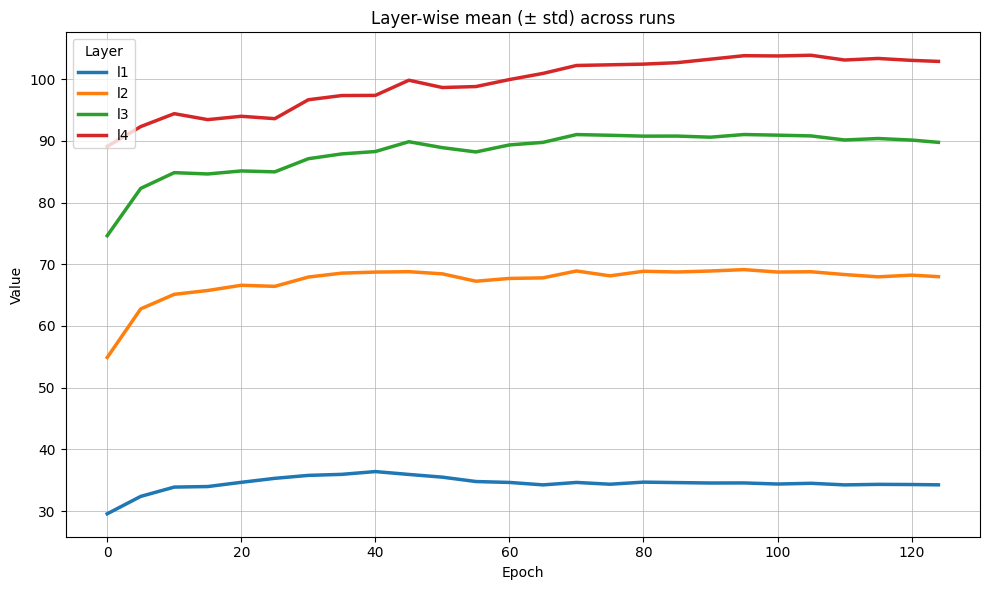

In [45]:
plot_layer_means_same_figure(
    dfs=dfs,          # list of MI_KL DataFrames
    show_std=False,
    logy=False
)
